In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
df = pd.read_csv("lungvol.csv")

In [26]:
df.head()

,Unnamed: 0,age,height,sex,IC
0,0,5,110.1,F,0.780
1,1,6,116.0,F,0.887
2,2,7,121.7,F,1.000
3,3,8,127.5,F,1.125
4,4,9,133.5,F,1.263


In [28]:
df = df.drop('Unnamed: 0',axis=1)

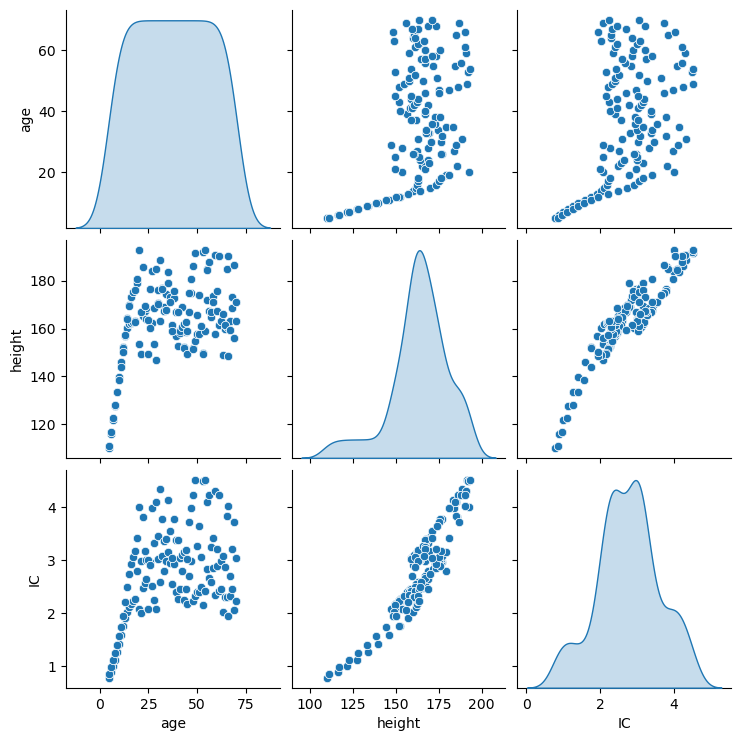

In [30]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [32]:
df = df.drop('sex',axis=1)

In [34]:
y = df['IC']
X = df.drop('IC',axis=1)

In [483]:
polynomial_converter = PolynomialFeatures(degree=6,include_bias=False)

In [485]:
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(396, 27)

In [487]:
X.shape

(396, 2)

In [489]:
X.iloc[0] #index on position 

age         5.0
height    110.1
Name: 0, dtype: float64

In [491]:
from sklearn.model_selection import train_test_split

In [493]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [495]:
from sklearn.linear_model import LinearRegression

In [497]:
model = LinearRegression(fit_intercept=True)

In [499]:
model.fit(X_train,y_train)

LinearRegression()

In [501]:
test_pred = model.predict(X_test)
#df['test_pred']=test_pred
test_pred;

In [503]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [505]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)
RMSE

0.2383082812907411

In [507]:
MSE

0.05679083693174698

In [509]:
df['IC'].mean()

2.7641515151515152

In [511]:
df['residual'] = df['IC'] - df['test_pred']

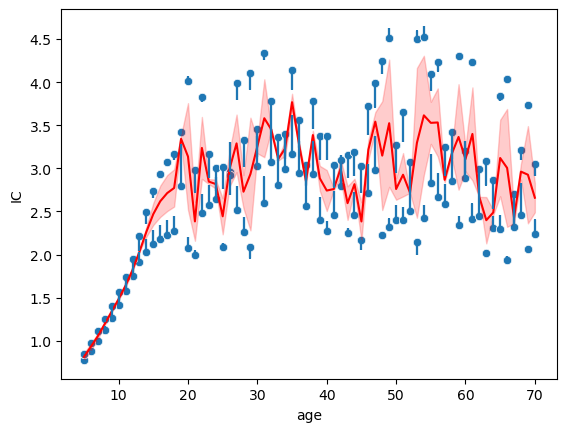

In [513]:
sns.scatterplot(data=df,x='age',y='IC')
sns.lineplot(data=df,x='age',y='test_pred',color='red')
plt.vlines(df['age'],df['IC'],df['IC']-df['residual'])

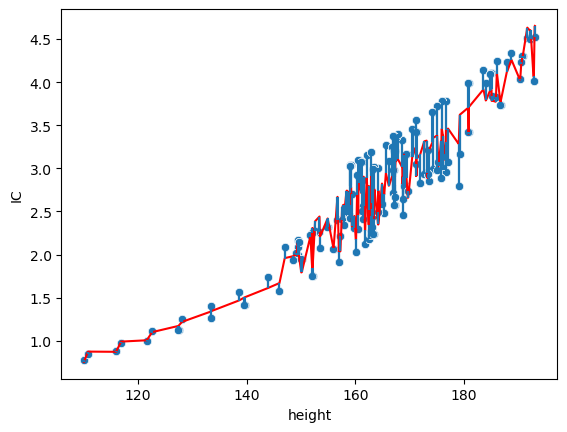

In [515]:
sns.scatterplot(data=df,x='height',y='IC')
sns.lineplot(data=df,x='height',y='test_pred',color='red')
plt.vlines(df['height'],df['IC'],df['IC']-df['residual'])

<Axes: xlabel='residual', ylabel='Density'>

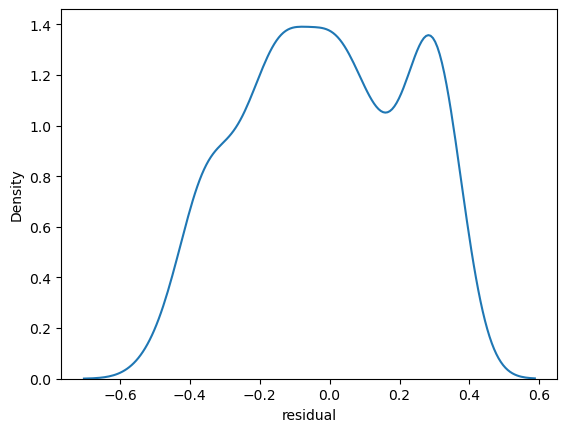

In [517]:
sns.kdeplot(df['residual'])

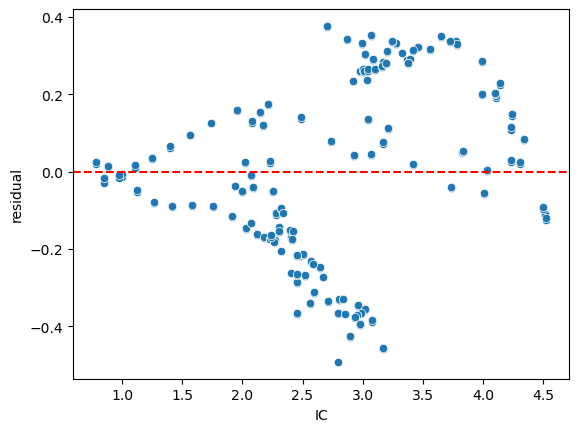

In [519]:
sns.scatterplot(data=df,x='IC',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [463]:
# training error per degree
train_rmse_errors = []
# test error per degree
test_rmse_errors = []
for d in range(1,20):
    
    # create polynomial data set
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # split the new dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # predic for train and test 
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # append errors to lists for plotting  
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

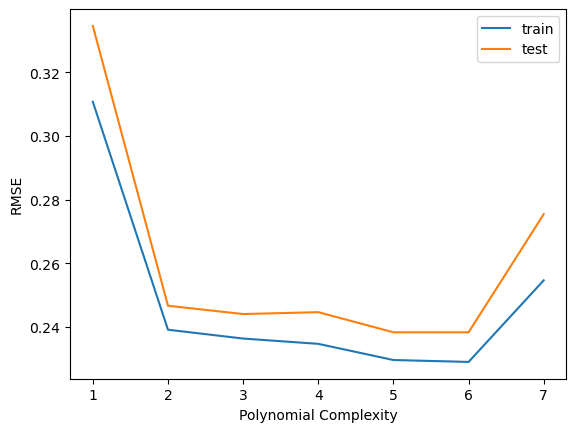

In [530]:
plt.plot(range(1,8),train_rmse_errors[:7],label='train')
plt.plot(range(1,8),test_rmse_errors[:7],label='test')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
#plt.ylim(0,10)
plt.legend()